<a href="https://colab.research.google.com/github/nicholas99212/DS1002/blob/main/Copy_of_3_29_24_Assignment_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [1]:
# List group members (if applicable). Identify names and computing IDs
#
# Name                    Computing ID

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [2]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
# Imports relevant packages
ftx = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv', delimiter = ';') # Imports csv file as variable ftx. delimiter command is needed to separate the columns. Opening the original file shows that the the character ';' separates the rows and therefore should be the delimiter

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [3]:
print(ftx.shape) # Gives shape of ftx dataset, in rows and columns. There are 741 rows and 11 columns

(741, 11)


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [4]:
ftx1 = ftx.copy() # Creates copy of ftx dataframe to manipulate and clean

ftx1 = ftx1.drop_duplicates() # Drops all duplicate rows
print('Duplicate rows after cleaning:', ftx1.duplicated().sum()) # Shows new number of duplicate rows (0)

print('Missing values by column:', ftx1.isnull().sum()) # Prints missing values by each column, shows that there's no missing values

ftx1['timestamp'] = pd.to_datetime(ftx1['timestamp']) # Converts 'timestamp' data to datetime format
ftx1 = ftx1.sort_values(by='timestamp', ascending = True) # Sorts ftx1 dataset by timestamp values. "ascending = True" makes the first rows shown based on the earliest timestamp, but doesn't change their index.
ftx1 = ftx1.reset_index(drop = True) # Assigns index of rows in the dataset based on their ascending order of date, now the earliest date has an index of 0 rather than having the highest index. Drop=true makes sure the first index is dropped from the dataset and only the new index remains

drop_columns = ['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'] # Creates list with names of columns to drops
ftx1 = ftx1.drop(columns=drop_columns) # Drops columns from ftx1 using list created in previous line of code

ftx1 # Shows updated ftx1 dataframe

Duplicate rows after cleaning: 0
Missing values by column: timeOpen     0
timeClose    0
timeHigh     0
timeLow      0
open         0
high         0
low          0
close        0
volume       0
marketCap    0
timestamp    0
dtype: int64


,open,high,low,close,volume,timestamp
0,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999000+00:00
1,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04 23:59:59.999000+00:00
2,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05 23:59:59.999000+00:00
3,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06 23:59:59.999000+00:00
4,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07 23:59:59.999000+00:00
...,...,...,...,...,...,...
722,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27 23:59:59.999000+00:00
723,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28 23:59:59.999000+00:00
724,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29 23:59:59.999000+00:00
725,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30 23:59:59.999000+00:00


Now display the first 10 rows of the cleaned dataset.

In [5]:
ftx1.head(10) # head command shows first 10 rows

,open,high,low,close,volume,timestamp
0,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03 23:59:59.999000+00:00
1,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04 23:59:59.999000+00:00
2,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05 23:59:59.999000+00:00
3,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06 23:59:59.999000+00:00
4,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07 23:59:59.999000+00:00
5,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08 23:59:59.999000+00:00
6,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09 23:59:59.999000+00:00
7,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10 23:59:59.999000+00:00
8,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11 23:59:59.999000+00:00
9,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12 23:59:59.999000+00:00


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [6]:
ftx1["close_change"] = ftx1["close"].diff() # Creates new colum "close_change" that takes the difference in the "close" column between the current and previous row
ftx1 # shows updated ftx1 dataframe

,open,high,low,close,volume,timestamp,close_change
0,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999000+00:00,NaN
1,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04 23:59:59.999000+00:00,0.590111
2,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05 23:59:59.999000+00:00,1.150608
3,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06 23:59:59.999000+00:00,0.726110
4,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07 23:59:59.999000+00:00,0.171334
...,...,...,...,...,...,...,...
722,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27 23:59:59.999000+00:00,-0.007028
723,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28 23:59:59.999000+00:00,-0.037577
724,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29 23:59:59.999000+00:00,-0.025860
725,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30 23:59:59.999000+00:00,-0.021183


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [7]:
ftx1.sort_values(['close_change'], ascending = False).head(10) # Uses sort value function based on the column 'close_change' and sets ascending = False to show the days with greatest value for close_change. Head command shows top 10 rows.

,open,high,low,close,volume,timestamp,close_change
241,48.511426,65.970515,47.177669,65.181877,1.743544e+09,2021-09-01 23:59:59.999000+00:00,16.677156
246,63.527662,77.351114,62.268965,73.347876,2.040937e+09,2021-09-06 23:59:59.999000+00:00,9.800320
47,26.254523,34.601007,26.254523,34.577106,2.767550e+08,2021-02-19 23:59:59.999000+00:00,8.335900
141,27.003012,33.723822,27.003012,33.404150,1.677276e+08,2021-05-24 23:59:59.999000+00:00,6.333923
65,32.013785,37.566227,31.849448,37.532879,1.513847e+08,2021-03-09 23:59:59.999000+00:00,5.529699
218,43.588232,49.457371,41.870726,48.892233,1.948272e+08,2021-08-09 23:59:59.999000+00:00,5.325192
248,70.990536,78.626754,61.990467,76.188545,2.855900e+09,2021-09-08 23:59:59.999000+00:00,5.239728
113,46.423056,51.315860,46.273925,50.871603,1.430288e+08,2021-04-26 23:59:59.999000+00:00,4.504385
122,53.798787,58.515094,53.450072,58.496713,1.256225e+08,2021-05-05 23:59:59.999000+00:00,4.488174
420,41.569745,46.361925,41.245399,45.972602,1.709422e+08,2022-02-28 23:59:59.999000+00:00,4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [8]:
ftx1["rate_of_change"] = ftx1["close"].pct_change() # Creates new column "rate_of_change" using pct._change() function to take the percent change in 'close' column from current and previous row
ftx1 # Shows updated ftx1 dataframe with rate_of_change column

,open,high,low,close,volume,timestamp,close_change,rate_of_change
0,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999000+00:00,NaN,NaN
1,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04 23:59:59.999000+00:00,0.590111,0.085227
2,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05 23:59:59.999000+00:00,1.150608,0.153127
3,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06 23:59:59.999000+00:00,0.726110,0.083801
4,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07 23:59:59.999000+00:00,0.171334,0.018245
...,...,...,...,...,...,...,...,...
722,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27 23:59:59.999000+00:00,-0.007028,-0.007552
723,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28 23:59:59.999000+00:00,-0.037577,-0.040682
724,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29 23:59:59.999000+00:00,-0.025860,-0.029184
725,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30 23:59:59.999000+00:00,-0.021183,-0.024625


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [9]:
change_table = pd.concat([ftx1.sort_values(['rate_of_change'], ascending = False).head(5), ftx1.sort_values(['rate_of_change'], ascending = True).head(5)])
# Creates change_table dataframe which is a concatenation of the 5 most positive values of the 'rate_of_change' column and 5 most negative values
change_table # Displays change_table


,open,high,low,close,volume,timestamp,close_change,rate_of_change
675,2.286410,4.202124,2.142760,3.516938,9.893206e+08,2022-11-10 23:59:59.999000+00:00,1.216311,0.528686
241,48.511426,65.970515,47.177669,65.181877,1.743544e+09,2021-09-01 23:59:59.999000+00:00,16.677156,0.343825
47,26.254523,34.601007,26.254523,34.577106,2.767550e+08,2021-02-19 23:59:59.999000+00:00,8.335900,0.317665
704,1.364261,1.905007,1.327899,1.700540,7.826265e+07,2022-12-09 23:59:59.999000+00:00,0.336669,0.246848
680,1.474274,1.991792,1.407320,1.835913,1.212039e+08,2022-11-15 23:59:59.999000+00:00,0.361149,0.244886
673,22.137788,22.137788,3.146795,5.518904,3.346184e+09,2022-11-08 23:59:59.999000+00:00,-16.623292,-0.750752
674,5.522477,6.246743,2.056713,2.300628,1.320746e+09,2022-11-09 23:59:59.999000+00:00,-3.218276,-0.583137
678,2.090581,2.172526,1.458536,1.489264,2.975154e+08,2022-11-13 23:59:59.999000+00:00,-0.599637,-0.287059
136,51.022526,51.777005,34.195120,36.937387,5.432536e+08,2021-05-19 23:59:59.999000+00:00,-14.017812,-0.275101
676,3.515314,3.676701,2.474017,2.590422,6.173261e+08,2022-11-11 23:59:59.999000+00:00,-0.926516,-0.263444


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

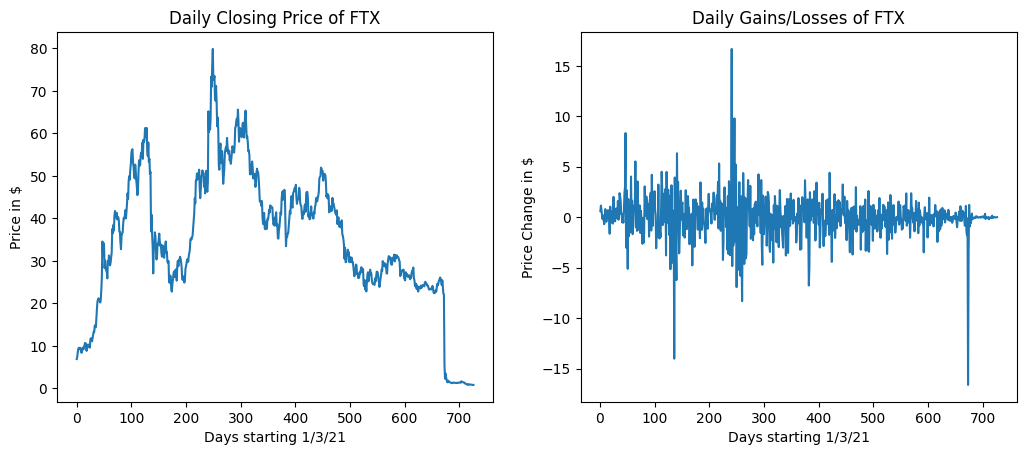

In [10]:
plt.subplot(1,2,1) # Creates a subplot, for first graph showing closing price
plt.plot(ftx1.close) # Creates a line plot with closing price as y axis, row index as x axis
plt.ylabel('Price in $') # Creates x axis label
plt.xlabel('Days starting 1/3/21') # Creates y axis label (Each row is a separate day)
plt.title('Daily Closing Price of FTX') # Gives title to graph


plt.subplot(1,2,2) # Creates a 2nd subplot for 2nd graph showing daily gains/losses
plt.plot(ftx1.close_change) # Creates a line plot with close_change as y axis, row index as x axis
plt.ylabel('Price Change in $')
plt.xlabel('Days starting 1/3/21')
plt.title('Daily Gains/Losses of FTX')

plt.subplots_adjust(left=1, right=2.5) # Adjusts subplot spacing


Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

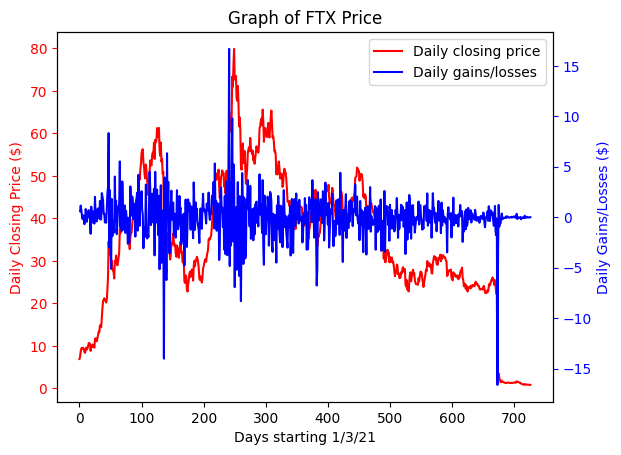

In [11]:
fig, ax1 = plt.subplots() # Creates a figure and ax1, a plot within that figure. plt.subplots() used so that multiple plots can be used for the figure

ax1.set_xlabel('Days starting 1/3/21')
ax1.set_ylabel('Daily Closing Price ($)', color = 'red') # Sets y axis label for 1st plot and assigns the color red
ax1.plot(ftx1.close, color = 'red', label = 'Daily closing price') # Plots close column using a line plot, uses the color red for the line, and assigned a label for legend
ax1.tick_params(axis='y', colors = 'red') # Sets tick marks on first y axis to be red

ax2 = ax1.twinx() # Creates a second plot that shares x axis but has different y axis
ax2.set_ylabel('Daily Gains/Losses ($)', color = 'blue') # Sets y axis label for 2nd plot
ax2.plot(ftx1.close_change, color = 'blue', label = 'Daily gains/losses') # Plots close_change column using a line plot, uses the color blue for the line, and assigned a label for legend
ax2.tick_params(axis='y', colors = 'blue') # Sets tick marks on 2nd y axis to be blue

legend1, label1 = ax1.get_legend_handles_labels() # Creates a tuple (legend1, label1) that uses the get_legend_handles_labels() command to retrieve the label for the lineplot ax1
legend2, label2 = ax2.get_legend_handles_labels() # Creates another tuple but for ax2

ax1.legend(legend1 + legend2, label1 + label2) # Creates a legend using previous tuples for ax1 and ax2
plt.title('Graph of FTX Price') # Gives a title to graph
plt.show() # Displays graph